In [1]:
# Set up dependencies

import pandas as pd
import os as os
import numpy as np
# data visualization library 
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Import the raw data into a DataFrame

csvpath = ("data.csv")
Raw_data = pd.read_csv(csvpath)
# Drop the null columns where all values are null
Raw_data = Raw_data.dropna(axis='columns', how='all')
Raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
Raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Comparing mean values for benign and malignant lesions

In [4]:
# Assign x (attributes) and y (categories of diagnosis) values to explore dataset

# Assign y to the diagnosis values (M or B)

y = Raw_data.diagnosis

# Assign the x to the attributes of the dataset and drop the id and diagnosis as attributes

list = ['id','diagnosis']
x = Raw_data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

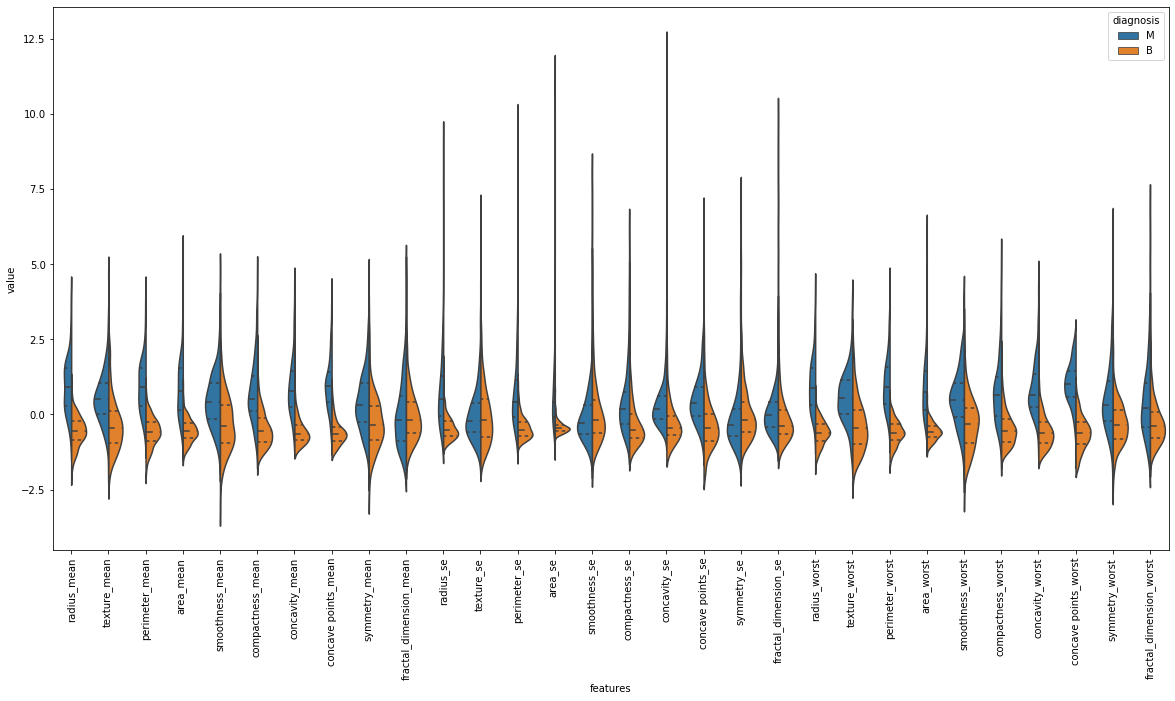

In [5]:
# Data visualization of the distribution for all 30 attributes
# Taken from https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

data_dia = y
data = x

# Standardization of the data
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,0:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

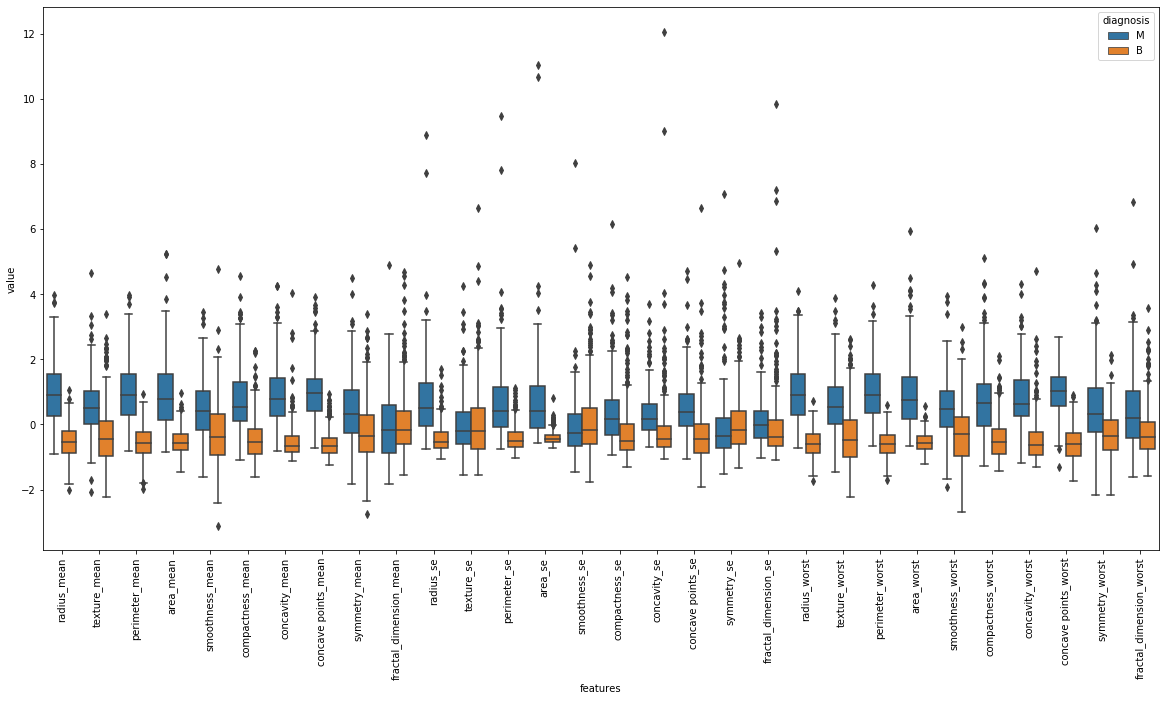

In [6]:
# Box plot
# Taken from https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [7]:
# Create a dataframe with values only for benign diagnosis and removing ID field

benign_diagnosis = Raw_data.loc[Raw_data["diagnosis"] == "B", :]
benign_diagnosis = benign_diagnosis.drop("id",axis = 1 )
benign_diagnosis.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [8]:
# Calculating the mean value for each attribute of the benign tumors

benign_means = benign_diagnosis.mean()

In [9]:
# Create a dataframe with values only for malignant diagnosis and removing ID field

malignant_diagnosis = Raw_data.loc[Raw_data["diagnosis"] == "M", :]
malignant_diagnosis = malignant_diagnosis.drop("id",axis = 1 )
malignant_diagnosis.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Calculating the mean value for each attribute of the benign tumors

malignant_means = malignant_diagnosis.mean()

In [11]:
# t-test for radius
(t_stat_radius, p_radius) = stats.ttest_ind(benign_diagnosis.iloc[:,1],malignant_diagnosis.iloc[:,1], equal_var=False)

In [12]:
# Report the data

print(f"The average radius for benign is {benign_means[0]}")
print(f"The average radius for malignant is {malignant_means[0]}")
print(f"p is {p_radius}.")
print('----------------------------------------------------------')
if p_radius < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average radius for benign is 12.14652380952381
The average radius for malignant is 17.46283018867925
p is 1.6844591259582747e-64.
----------------------------------------------------------
The difference in sample means is significant.


In [13]:
# t-test for texture

(t_stat_texture, p_texture) = stats.ttest_ind(benign_diagnosis.iloc[:,2],malignant_diagnosis.iloc[:,2], equal_var=False)

In [14]:
# Report the data

print(f"The average texture for benign is {benign_means[1]}")
print(f"The average texture for malignant is {malignant_means[1]}")
print(f"p is {p_texture}.")
print('----------------------------------------------------------')
if p_texture < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average texture for benign is 17.914761904761892
The average texture for malignant is 21.60490566037735
p is 3.019055292193917e-25.
----------------------------------------------------------
The difference in sample means is significant.


In [15]:
# t-test for perimeter

(t_stat_perimeter, p_perimeter) = stats.ttest_ind(benign_diagnosis.iloc[:,3],malignant_diagnosis.iloc[:,3], equal_var=False)

In [16]:
# Report the data

print(f"The average perimeter for benign is {benign_means[2]}")
print(f"The average perimeter for malignant is {malignant_means[2]}")
print(f"p is {p_perimeter}.")
print('----------------------------------------------------------')
if p_perimeter < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average perimeter for benign is 78.07540616246497
The average perimeter for malignant is 115.36537735849062
p is 1.0231409970104587e-66.
----------------------------------------------------------
The difference in sample means is significant.


In [17]:
# t-test for area

(t_stat_area, p_area) = stats.ttest_ind(benign_diagnosis.iloc[:,4],malignant_diagnosis.iloc[:,4], equal_var=False)

In [18]:
# Report the data

print(f"The average area for benign is {benign_means[3]}")
print(f"The average area radius for malignant is {malignant_means[3]}")
print(f"p is {p_area}.")
print('----------------------------------------------------------')
if p_area < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average area for benign is 462.79019607843145
The average area radius for malignant is 978.3764150943397
p is 3.284366459573324e-52.
----------------------------------------------------------
The difference in sample means is significant.


In [19]:
# t-test for smoothness

(t_stat_smoothness, p_smoothness) = stats.ttest_ind(benign_diagnosis.iloc[:,5],malignant_diagnosis.iloc[:,5], equal_var=False)

In [20]:
# Report the data

print(f"The average smoothness for benign is {benign_means[4]}")
print(f"The average smoothness for malignant is {malignant_means[4]}")
print(f"p is {p_smoothness}.")
print('----------------------------------------------------------')
if p_smoothness < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average smoothness for benign is 0.09247764705882357
The average smoothness for malignant is 0.10289849056603775
p is 5.573331322107757e-19.
----------------------------------------------------------
The difference in sample means is significant.


In [21]:
# t-test for compactness

(t_stat_compactness, p_compactness) = stats.ttest_ind(benign_diagnosis.iloc[:,6],malignant_diagnosis.iloc[:,6], 
                                                    equal_var=False)

In [22]:
# Report the data

print(f"The average compactness for benign is {benign_means[5]}")
print(f"The average average compactness for malignant is {malignant_means[5]}")
print(f"p is {p_compactness}.")
print('----------------------------------------------------------')
if p_compactness < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average compactness for benign is 0.08008462184873952
The average average compactness for malignant is 0.14518778301886787
p is 9.607863145123788e-42.
----------------------------------------------------------
The difference in sample means is significant.


In [23]:
# t-test for concavity

(t_stat_concavity, p_concavity) = stats.ttest_ind(benign_diagnosis.iloc[:,7],malignant_diagnosis.iloc[:,7], 
                                                    equal_var=False)

In [24]:
# Report the data

print(f"The average concavity for benign is {benign_means[6]}")
print(f"The average average concavity for malignant is {malignant_means[6]}")
print(f"p is {p_concavity}.")
print('----------------------------------------------------------')
if p_concavity < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average concavity for benign is 0.04605762100840336
The average average concavity for malignant is 0.1607747169811321
p is 3.742120672313664e-58.
----------------------------------------------------------
The difference in sample means is significant.


In [25]:
# t-test for concave points

(t_stat_concavepoints, p_concavepoints) = stats.ttest_ind(benign_diagnosis.iloc[:,8],malignant_diagnosis.iloc[:,8], 
                                                    equal_var=False)

In [26]:
# Report the data

print(f"The average concave points for benign is {benign_means[7]}")
print(f"The average average concave points for malignant is {malignant_means[7]}")
print(f"p is {p_concavepoints}.")
print('----------------------------------------------------------')
if p_concavepoints < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average concave points for benign is 0.025717406162464995
The average average concave points for malignant is 0.08799000000000004
p is 3.1273162856782697e-71.
----------------------------------------------------------
The difference in sample means is significant.


In [27]:
# t-test for symmetry

(t_stat_symmetry, p_symmetry) = stats.ttest_ind(benign_diagnosis.iloc[:,9],malignant_diagnosis.iloc[:,9], 
                                                    equal_var=False)

In [28]:
# Report the data

print(f"The average symmetry for benign is {benign_means[8]}")
print(f"The average average symmetry for malignant is {malignant_means[8]}")
print(f"p is {p_symmetry}.")
print('----------------------------------------------------------')
if p_symmetry < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average symmetry for benign is 0.1741859943977591
The average average symmetry for malignant is 0.19290896226415097
p is 5.957650760938452e-15.
----------------------------------------------------------
The difference in sample means is significant.


In [29]:
# t-test for fractal dimension

(t_stat_fractal, p_fractal) = stats.ttest_ind(benign_diagnosis.iloc[:,10],malignant_diagnosis.iloc[:,10], 
                                                    equal_var=False)

In [30]:
# Report the data

print(f"The average fractal dimension for benign is {benign_means[9]}")
print(f"The average average fractal dimension for malignant is {malignant_means[9]}")
print(f"p is {p_fractal}.")
print('----------------------------------------------------------')
if p_fractal < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average fractal dimension for benign is 0.0628673949579832
The average average fractal dimension for malignant is 0.0626800943396226
p is 0.766721601131519.
----------------------------------------------------------
The difference in sample means is not significant.


In [31]:
# t-test for fractal dimension

(t_stat_symmetryse, p_symmetry_se) = stats.ttest_ind(benign_diagnosis.iloc[:,19],malignant_diagnosis.iloc[:,19], 
                                                    equal_var=False)

In [32]:
# Report the data

print(f"The average symmetry se for benign is {benign_means[18]}")
print(f"The average average symmetry se for malignant is {malignant_means[18]}")
print(f"p is {p_fractal}.")
print('----------------------------------------------------------')
if p_fractal < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The average symmetry se for benign is 0.02058380672268908
The average average symmetry se for malignant is 0.020472400943396227
p is 0.766721601131519.
----------------------------------------------------------
The difference in sample means is not significant.


# Data exploration and visualization summary

The previous charts and statistical analysis show the distribution of the different attributes. The Box plot is illustrative that the mean values for benign value sof the different attributes are lower than the same attribute for malignant tumors or cases. This difference might be important since there might be differences between malignant and benign cases that can be vital for the machine learning algorithm.

Most of the mean values seems to be different at statistical level. Based on the box plot, two attributes, fractal_dimension_mean and symmetry_se might not have different mean values based on the statistical analysis

# Determining correlation between attributes

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


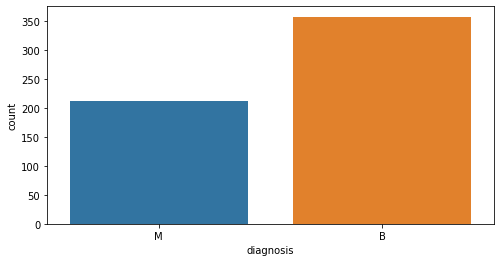

In [33]:
# Count of categories of diagnosis: Benign vs. Malignant
plt.figure(figsize=(8, 4))
sns.countplot(Raw_data['diagnosis'])

# count number of obvs in each class
Benign, Malignant = Raw_data['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', Benign)
print('Number of cells labeled Malignant : ', Malignant)
print('')
print('% of cells labeled Benign', round(Benign / len(Raw_data) * 100, 2), '%')
print('% of cells labeled Malignant', round(Malignant / len(Raw_data) * 100, 2), '%')

In [34]:
print(x.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [35]:
# Generating correlation matrix to test colinearity between attributes
# # Taken from https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

# Generate the correlation matrix
Correlation_coefficient = x.corr().round(2)

Correlation_coefficient.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50


In [ ]:
# Save correlation matrix to a pandasdataframe

Correlation_coefficient.to_csv("Correlation.csv")

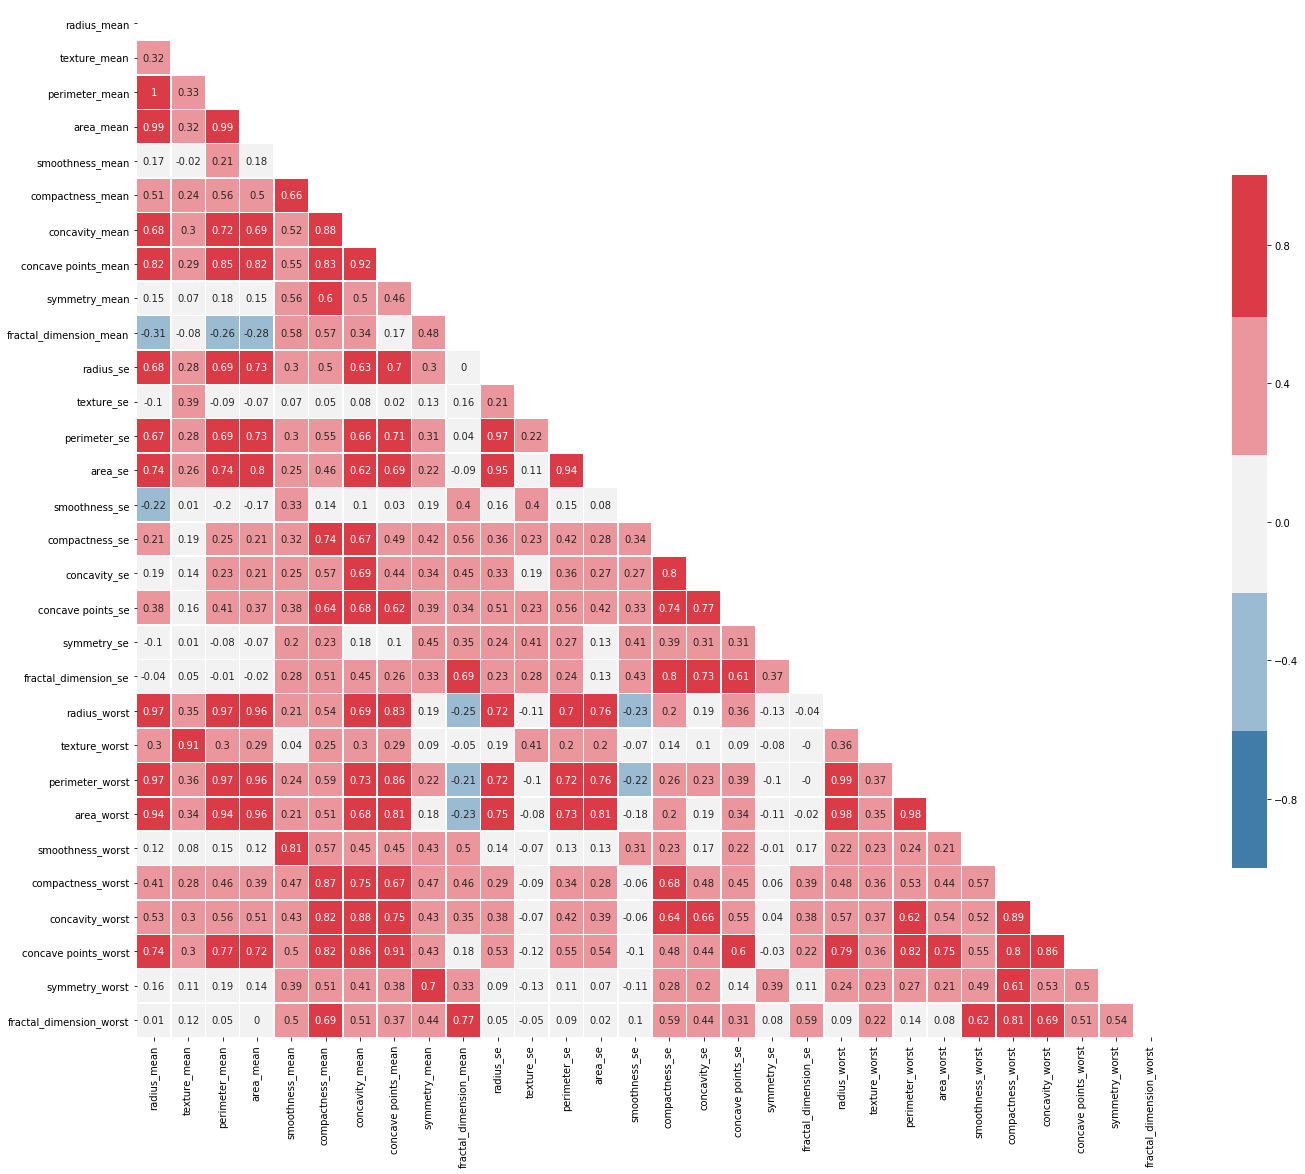

In [36]:
# Visualization of the correlation matrix

# Mask for the upper triangle
Lower_triangle = np.zeros_like(Correlation_coefficient, dtype=np.bool)
Lower_triangle[np.triu_indices_from(Lower_triangle)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20,20))

# Define custom colormap
cmap = sns.diverging_palette(240, 10, n= 5)


# Draw the heatmap
sns.heatmap(Correlation_coefficient, mask=Lower_triangle, vmin=-1, vmax=1, cmap = cmap, center=0,
            xticklabels=True, yticklabels=True,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)



plt.tight_layout()

# Main results of the correlation matrix

From the correlation matrix, we can observe that variables with high correlation (> 0.85) coefficient will likely have linear correlation among them. From the matrix, these are the pairis of variables that have the max correlation:

1) area_mean and radius_mean (0.99)
2) area_mean and perimeter_mean (0.99)
3) concave points_mean and concavity_mean (0.92)
4) perimeter_se and radius_se (0.97)
5) radius_se and area_se (0.95)
6) radius_worst and radius_mean (0.97)
7) radius_worst  and perimeter_mean (0.97)
8) radius_worst vs. area_mean(0.96)
9) texture_worst vs. texture_mean (0.91)
10) perimeter_worst and radius_mean (0.97)
11) perimeter_worst and perimeter_mean (0.97)
12) perimeter_worst and area_mean(0.96)
13) perimeter_worst and radius_worst (0.99)
14) area_worst and radius_mean (0.94)
15) area_worst and perimeter_mean (0.94)
12) area_worst and area_mean(0.96)
13) area_worst and radius_worst (0.98)
14) area_worst and perimeter_worst (0.99)
15) concave points_worst and concave points_mean (0.91)
16) perimeter_worst and concave points_mean (0.86)
17) compactness_worst and compactness_mean(0.87)
18) concavity_worst and concavity_mean (0.88)
19) concave points_worst and concavity_mean (0.86)


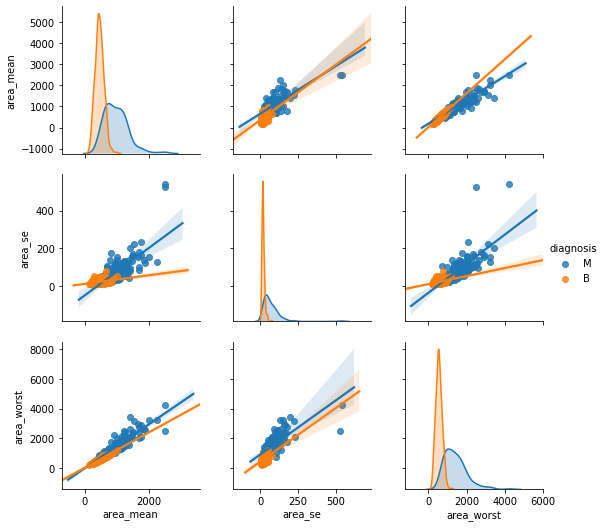

In [37]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Exploring correlation between related attributes: area

cols = ['diagnosis',
        'area_mean','area_se', 'area_worst']

sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")


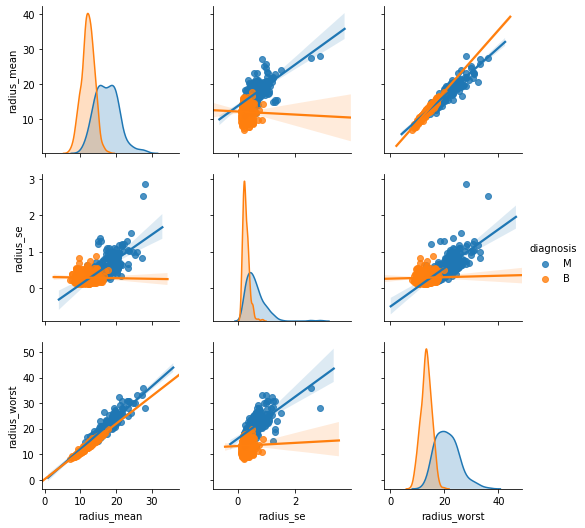

In [38]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Exploring correlation between related attributes: radius

cols = ['diagnosis',
        'radius_mean','radius_se', 'radius_worst']

sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

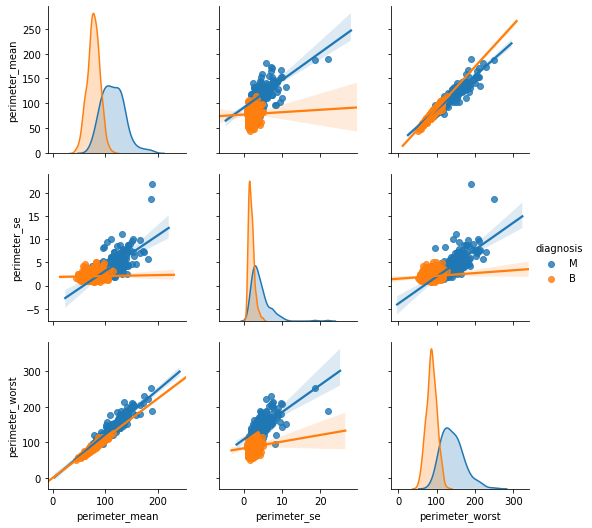

In [39]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Exploring correlation between related attributes: perimeter

cols = ['diagnosis',
        'perimeter_mean', 'perimeter_se', 'perimeter_worst']

sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

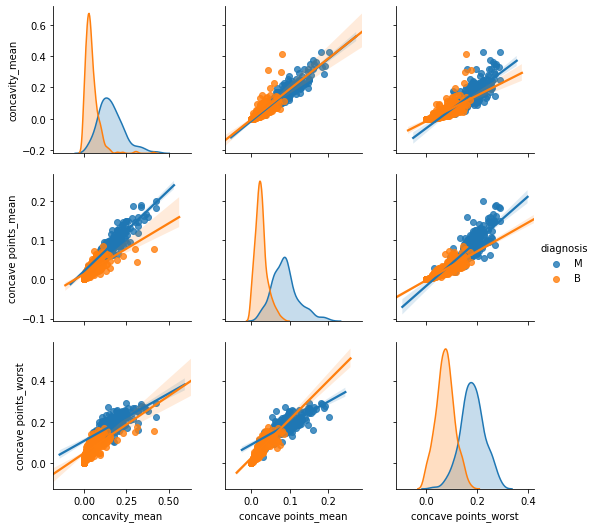

In [40]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Exploring correlation between related attributes: concave

cols = ['diagnosis',
        'concavity_mean','concave points_mean', 'concave points_worst']

sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

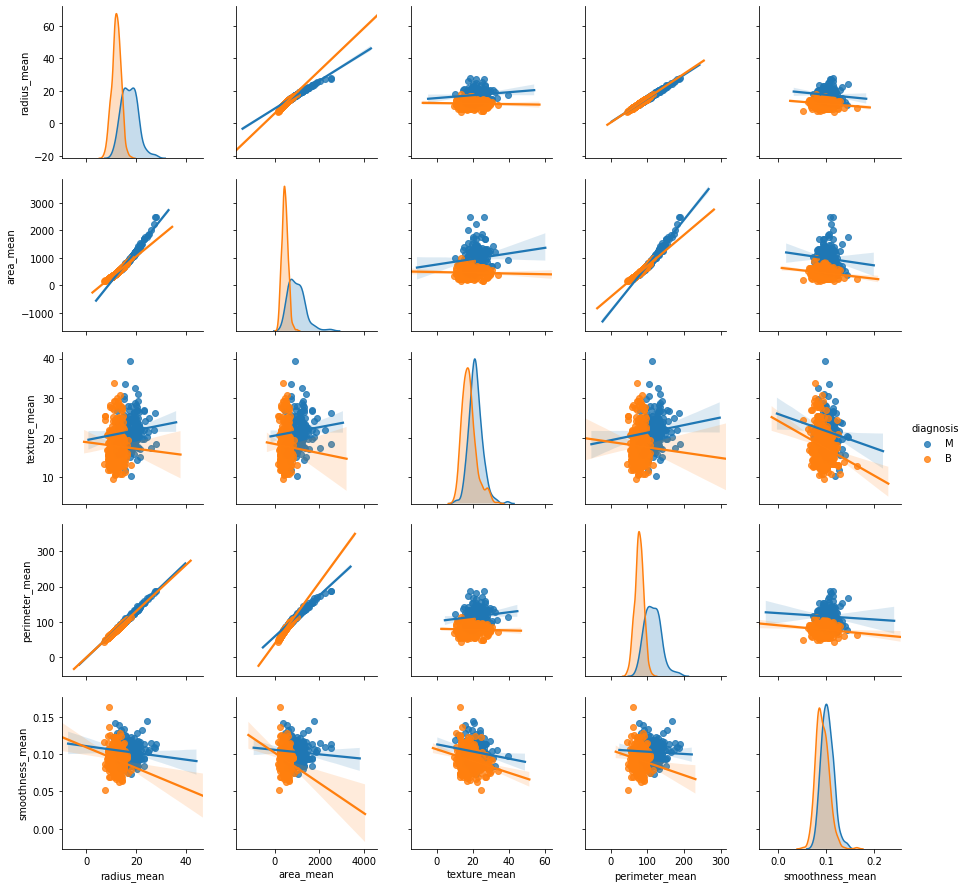

In [41]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the mean attributes (first 5)

cols = ['diagnosis',
        'radius_mean','area_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean']
sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

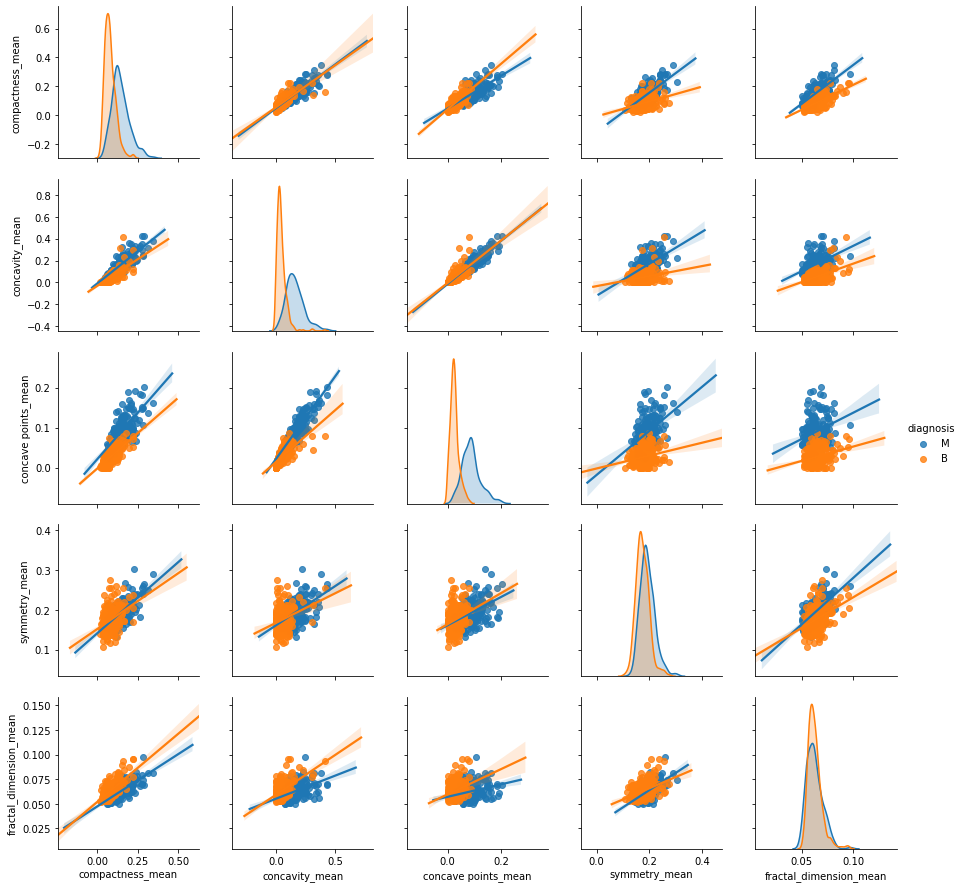

In [42]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the mean attributes (last 5)

cols = ['diagnosis',
        'compactness_mean','concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

# From the correlation matrix and visualization analysis we can infer:

1) From the analysis of the correlation matrix, we determine that the following attributes can be removed from the dataset to be used for the Machine Learning:  'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst','compactness_worst',  'concave points_worst', 'concavity_worst'. They all show high correlation coefficient (> 0.85)

2) concavity_mean and and compactness mean are also correlated (0.88). Since compactness_mean show lower correlation coefficient with other attributes, concavity_mean will be dropped

3) In addition, the attributes related to the area of the lesion (area, perimeter, radius) show a high correlation between area_mean and perimeter_mean and radius_mean. The selection might not entirely objective but area_mean might be a better parameter since the radius of the perimeter might be irregular due to the shape of the lesion. Therefore, all attributes related to perimeter and radius will also be removed

In [43]:
# Dropping the attributes that showed high correlation coeffecient (>0.85) and removing the ID field

columns_drop = ['id','radius_mean','radius_se', 'radius_worst', 'texture_worst', 'perimeter_mean', 'perimeter_se', 
                'perimeter_worst', 'area_worst','compactness_worst',  'concave points_worst', 'concavity_worst', 
                'concavity_mean']

final_data = Raw_data.drop(columns_drop,axis = 1 )
final_data.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


In [44]:
# Generate correlation matrix for the final attributes

# Assign the x_final to the attributes of the dataset and drop the id and diagnosis as attributes

x_final = final_data.drop("diagnosis",axis = 1 )
x_final.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,20.38,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


In [45]:
# Generating correlation matrix to test colinearity between attributes

# Generate the correlation matrix
Correlation_coefficient_final = x_final.corr().round(2)

Correlation_coefficient_final.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
texture_mean,1.00,0.32,-0.02,0.24,0.29,0.07,-0.08,0.39,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.08,0.11,0.12
area_mean,0.32,1.00,0.18,0.50,0.82,0.15,-0.28,-0.07,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.12,0.14,0.00
smoothness_mean,-0.02,0.18,1.00,0.66,0.55,0.56,0.58,0.07,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.81,0.39,0.50
compactness_mean,0.24,0.50,0.66,1.00,0.83,0.60,0.57,0.05,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.57,0.51,0.69
concave points_mean,0.29,0.82,0.55,0.83,1.00,0.46,0.17,0.02,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.45,0.38,0.37


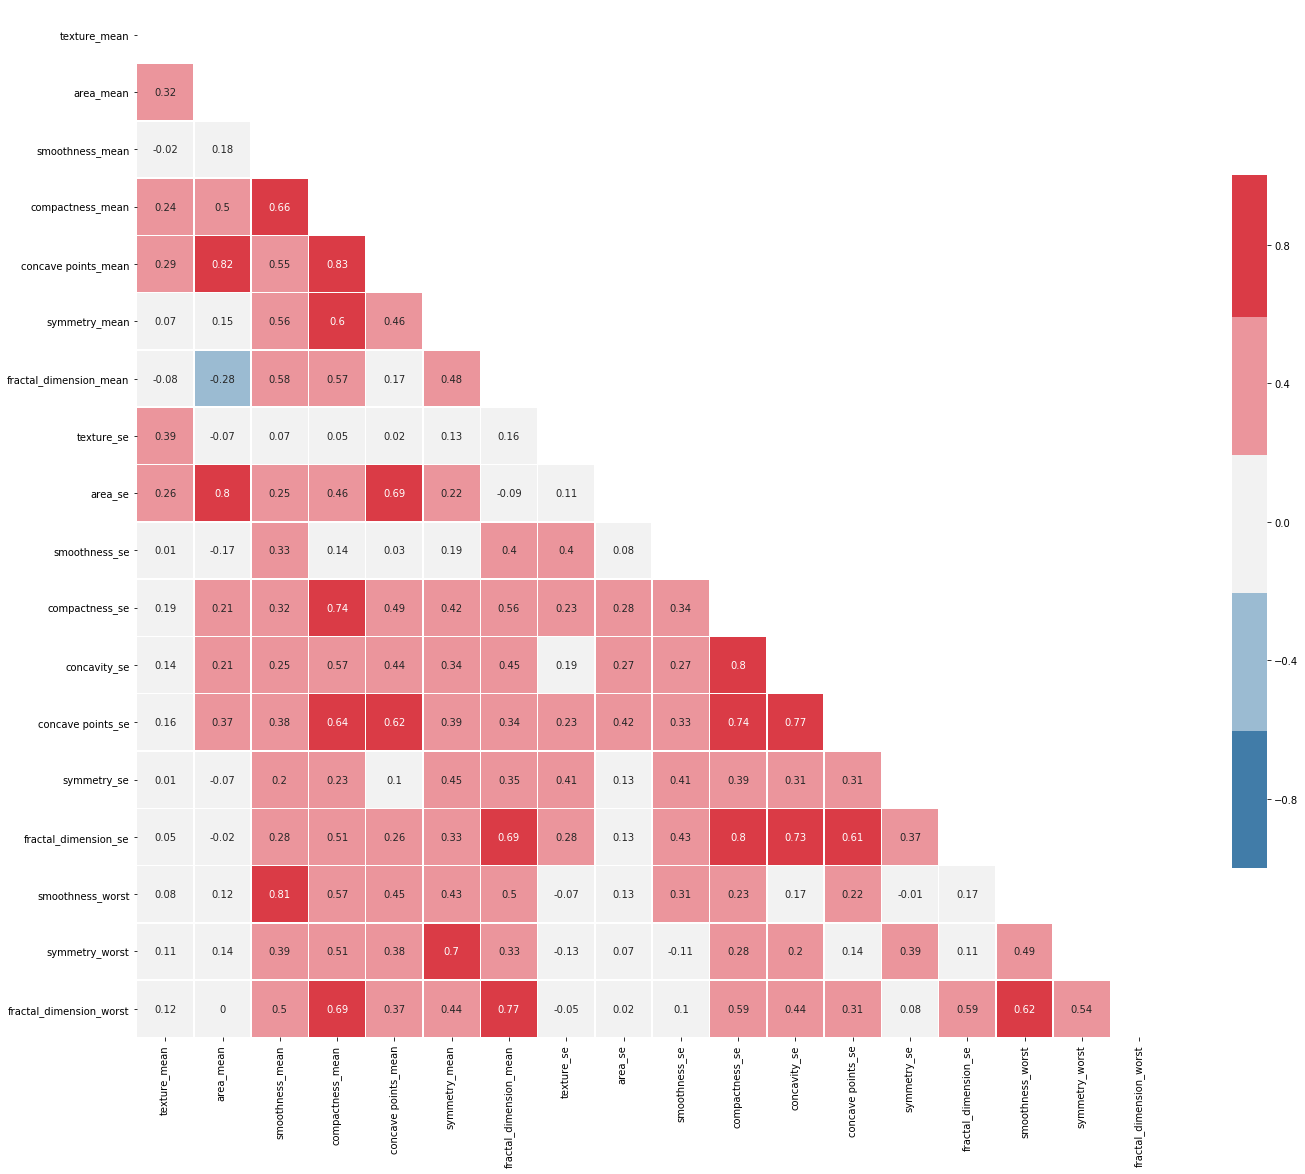

In [46]:
# Visualization of the correlation matrix for the selected attributes

# Mask for the upper triangle
Lower_triangle = np.zeros_like(Correlation_coefficient_final, dtype=np.bool)
Lower_triangle[np.triu_indices_from(Lower_triangle)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20,20))

# Define custom colormap
cmap = sns.diverging_palette(240, 10, n= 5)


# Draw the heatmap
sns.heatmap(Correlation_coefficient_final, mask=Lower_triangle, vmin=-1, vmax=1, cmap = cmap, center=0,
            xticklabels=True, yticklabels=True,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)



plt.tight_layout()

In [47]:
# Save final data to a pandasdataframe

final_data.to_csv("final_data.csv", index= False)